# Libraries

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3
from sqlite3 import Error
from sklearn.preprocessing import StandardScaler
from matplotlib.pyplot import figure
from collections import defaultdict 
from statistics import mean 

# SQL connections

In [4]:
def create_connection(db_file):
    conn = None
    try:
        conn = sqlite3.connect(db_file)
    except Error as e:
        print(e)
    return conn

In [5]:
database = 'lahman2014.sqlite'
def read_data(sql):
    # create a database connection
    conn = create_connection(database)
    with conn:
        cur = conn.cursor()
        cur.execute(sql)
        rows = cur.fetchall()
        return rows

# Reading Data

In [6]:
#Create Data frames for our main tables
Master_table_DF = pd.DataFrame(read_data("SELECT * from Master"))
Batting_table_DF = pd.DataFrame(read_data("SELECT * from Batting"))
Pitching_table_DF = pd.DataFrame(read_data("SELECT * from Pitching"))
Fielding_table_DF = pd.DataFrame(read_data("SELECT * from Fielding"))
# -------------------------------------------------------------------------
#Create data frames for our supplmented dataframes
AllStarFull_DF =  pd.DataFrame(read_data("SELECT * from AllStarFull"))
HallofFame_DF = pd.DataFrame(read_data("SELECT * from HallOfFame"))
Managers_DF = pd.DataFrame(read_data("SELECT * from Managers"))
Teams_DF = pd.DataFrame(read_data("SELECT * from Teams"))
BattingPost_DF =pd.DataFrame(read_data("SELECT * from BattingPost"))
PitchingPost_DF = pd.DataFrame(read_data("SELECT * from PitchingPost"))
TeamFranchises_DF = pd.DataFrame(read_data("SELECT * from TeamsFranchises"))
FieldingOF_DF = pd.DataFrame(read_data("SELECT * from FieldingOF"))
FieldingPost_DF = pd.DataFrame(read_data("SELECT * from FieldingPost"))
ManagersHalf_DF = pd.DataFrame(read_data("SELECT * from ManagersHalf"))
TeamsHalf_DF = pd.DataFrame(read_data("SELECT * from TeamsHalf"))
Salaries_DF = pd.DataFrame(read_data("SELECT * from Salaries"))
SeriesPost_DF = pd.DataFrame(read_data("SELECT * from SeriesPost"))
AwardsManagers_DF = pd.DataFrame(read_data("SELECT * from AwardsManagers"))
AwardsPlayers_DF = pd.DataFrame(read_data("SELECT * from AwardsPlayers"))
AwardsShareManagers_DF = pd.DataFrame(read_data("SELECT * from AwardsShareManagers"))
AwardsSharePlayers_DF =pd.DataFrame(read_data("SELECT * from AwardsSharePlayers"))
Appearances_DF =pd.DataFrame(read_data("SELECT * from Appearances"))
Schools_DF = pd.DataFrame(read_data("SELECT * from Schools"))
CollegePlaying_DF = pd.DataFrame(read_data("SELECT * from CollegePlaying"))

# Part 1 : Data Wrangling 

### preprocessing

In [7]:
def rename_columns(Mylist, DF):
    for i in range(0, len(Mylist)):
        DF.rename(columns={i : Mylist[i]}, inplace=True)
    return DF

In [8]:
# ------------ rename the 2 tables columns so you can easily deal with them
no_columns_TeamsDF = Teams_DF.shape[1]          #48
column_name_TeamsDF = ['yearID','lgID','teamID','franchID','divID','Rank','G','GHome','W','L',
                       'DivWin','WCWin','LgWin','WSWin','R','AB','H','2B','3B','HR','BB','SO',
                       'SB','CS','HBP','SF','RA','ER','ERA','CG','SHO','SV','IPOuts','HA','HRA',
                       'BBA','SOA','E','DP','FP','name','park','attendance','BPF','PPF','teamIDBR',
                       'teamIDlahman45','teamIDretro']
no_columns_SalariesDF = Salaries_DF.shape[1]    #5
column_name_SalariesDF = ['yearID', 'teamID','lgID','playerID','salary']
New_TeamsDF = rename_columns(column_name_TeamsDF, Teams_DF)
New_Salaries_DF = rename_columns(column_name_SalariesDF, Salaries_DF)


#------------ Clean dataframes
New_TeamsDF = New_TeamsDF.fillna(0)
New_Salaries_DF = New_Salaries_DF.fillna(0)

In [9]:
#merge the teams and salaries dataframes
#DF_merged = pd.merge(New_TeamsDF , New_Salaries_DF)
DF_merged = pd.merge(New_TeamsDF, New_Salaries_DF, how = 'inner')
DF_merged = DF_merged.fillna(0)
display(DF_merged)

,yearID,lgID,teamID,franchID,divID,Rank,G,GHome,W,L,...,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro,playerID,salary
0,1985,AL,BAL,BAL,E,4,161,81.0,83,78,...,Baltimore Orioles,Memorial Stadium,2132387.0,97,97,BAL,BAL,BAL,boddimi01,625000.0
1,1985,AL,BAL,BAL,E,4,161,81.0,83,78,...,Baltimore Orioles,Memorial Stadium,2132387.0,97,97,BAL,BAL,BAL,dauerri01,480000.0
2,1985,AL,BAL,BAL,E,4,161,81.0,83,78,...,Baltimore Orioles,Memorial Stadium,2132387.0,97,97,BAL,BAL,BAL,davisst02,437500.0
3,1985,AL,BAL,BAL,E,4,161,81.0,83,78,...,Baltimore Orioles,Memorial Stadium,2132387.0,97,97,BAL,BAL,BAL,dempsri01,512500.0
4,1985,AL,BAL,BAL,E,4,161,81.0,83,78,...,Baltimore Orioles,Memorial Stadium,2132387.0,97,97,BAL,BAL,BAL,dwyerji01,375000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24701,2014,NL,WAS,WSN,E,1,162,81.0,96,66,...,Washington Nationals,Nationals Park,2579389.0,104,102,WSN,MON,WAS,storedr01,3450000.0
24702,2014,NL,WAS,WSN,E,1,162,81.0,96,66,...,Washington Nationals,Nationals Park,2579389.0,104,102,WSN,MON,WAS,strasst01,3975000.0
24703,2014,NL,WAS,WSN,E,1,162,81.0,96,66,...,Washington Nationals,Nationals Park,2579389.0,104,102,WSN,MON,WAS,werthja01,20000000.0
24704,2014,NL,WAS,WSN,E,1,162,81.0,96,66,...,Washington Nationals,Nationals Park,2579389.0,104,102,WSN,MON,WAS,zimmejo02,7500000.0


858


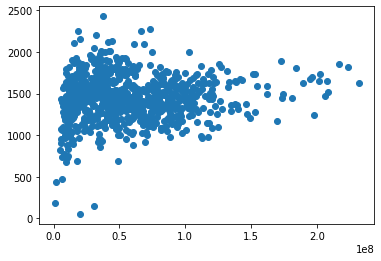

In [12]:

List1 = DF_merged.teamID
List2 = DF_merged.yearID
p = list(zip(List1, List2))

res = defaultdict(list) 
for _, row in DF_merged.iterrows():
    key = p[_]
    value = row.salary
    if key in res:
        res[key] += value
    else:
        res[key] = value  
        
Dic = dict(res)
Salaries_List = list(Dic.values())


res1 = defaultdict(list)
for _, row in DF_merged.iterrows():
    key = p[_]
    value = (row.W / row.G) * 100
    if key in res1:
        res1[key] += value
    else:
        res1[key] = value  
        
Dic2 = dict(res1)
Calc_List = list(Dic2.values())

plt.scatter(Salaries_List, Calc_List)
print(len(Salaries_List))

# Part 2 : Exploratory Data Analysis

### 2.1 Payroll distribution

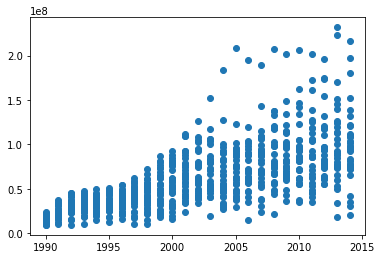

In [13]:
Years = []
Payrolls = []

DF_ = pd.DataFrame()
Payroll_Disribution_keys = list(Dic.keys())
Payroll_Disribution_values = list(Dic.values())

indx = 0
for i, ii in Payroll_Disribution_keys:
    if ii >= 1990 and ii <= 2014:
        Years.append(ii)
        Payrolls.append(Payroll_Disribution_values[indx])
    indx = indx + 1

plt.scatter(Years, Payrolls)

To describe a distribution you should think about 4 things:
* Shape (left skew or right skew or semmetric)
* Central spread/Disribution : mean, median
* Spread : range, IQR, MAD(mean absolute deviation), standard deviation
* Outliers

In [30]:
# to calculate the center spread (mean method) of the data
mean_data = mean(Payrolls)
print(mean_data)

63391754.00274725


In [31]:
#to calculate the range of our data
mini = min(Payrolls)
maxi = max(Payrolls)
Myrange = maxi - mini
print(Myrange)

222605842.0


In [28]:
#to find the outliers by looking at the graph we can approximately extract no. of outliers

#### From the distribution graph above we can find that:
* Our data is left skewed
* The central spread of our data on payroll is 63391754.00274725 "without using standardizations"
* To calculate the range of the data we used (range method) and our range is : 222605842.0 "without using standardizations"
* #outliers : ~14

### 2.2 Correlation between payroll and winning percentage

In [ ]:
'''
(1)3ayz amsk al dataframe amsk kol interval (1990-1994) (1995-1999) (2000-2004) (2005-2009) (2010-2014)
(2)le kol interval ageb al mean lel payroll w mean lel winning percentage for every team in this interval
(3)a7ot kol al means aly gbtha mn al step aly fo2 w a7otha fe list w hya de al h3mlha plot lel interval dh
(4)dh m3nah 2n ana m7tag a3ml 5 plot (because we have five intervals)
(5)make your comment on the results
'''

In [41]:
#clean the dataframe to get dates starts with 1990
New_DF_merged = pd.DataFrame()
for _, row in DF_merged.iterrows():
    if row.yearID >= 1990:
        row10 = pd.DataFrame([row])
        New_DF_merged = pd.concat([New_DF_merged, row10], ignore_index=True)
display(New_DF_merged)

,yearID,lgID,teamID,franchID,divID,Rank,G,GHome,W,L,...,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro,playerID,salary
0,1990,AL,BAL,BAL,E,5,161,80.0,76,85,...,Baltimore Orioles,Memorial Stadium,2415189.0,97,98,BAL,BAL,BAL,anderbr01,120000.0
1,1990,AL,BAL,BAL,E,5,161,80.0,76,85,...,Baltimore Orioles,Memorial Stadium,2415189.0,97,98,BAL,BAL,BAL,ballaje01,200000.0
2,1990,AL,BAL,BAL,E,5,161,80.0,76,85,...,Baltimore Orioles,Memorial Stadium,2415189.0,97,98,BAL,BAL,BAL,bautijo01,120000.0
3,1990,AL,BAL,BAL,E,5,161,80.0,76,85,...,Baltimore Orioles,Memorial Stadium,2415189.0,97,98,BAL,BAL,BAL,bellju01,100000.0
4,1990,AL,BAL,BAL,E,5,161,80.0,76,85,...,Baltimore Orioles,Memorial Stadium,2415189.0,97,98,BAL,BAL,BAL,bradlph01,1150000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21412,2014,NL,WAS,WSN,E,1,162,81.0,96,66,...,Washington Nationals,Nationals Park,2579389.0,104,102,WSN,MON,WAS,storedr01,3450000.0
21413,2014,NL,WAS,WSN,E,1,162,81.0,96,66,...,Washington Nationals,Nationals Park,2579389.0,104,102,WSN,MON,WAS,strasst01,3975000.0
21414,2014,NL,WAS,WSN,E,1,162,81.0,96,66,...,Washington Nationals,Nationals Park,2579389.0,104,102,WSN,MON,WAS,werthja01,20000000.0
21415,2014,NL,WAS,WSN,E,1,162,81.0,96,66,...,Washington Nationals,Nationals Park,2579389.0,104,102,WSN,MON,WAS,zimmejo02,7500000.0
